<a href="https://colab.research.google.com/github/s4kh4rov/comp-ling/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, gutenberg, inaugural
from nltk.draw.dispersion import dispersion_plot
from nltk.collocations import *
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
get_ipython().run_line_magic('matplotlib', 'inline')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
def analyze_text(text, words):
  print("Длина текста ", len(words))
  print("Число различных слов в словаре ", len(set(words)))
  print("Параметр лексического разнообразия текста ", len(set(words)) / len(words))

  words = word_tokenize(text)
  words_from_text = []
  for word in words:
    # проверка на то,что строка не пустая
    if word.isalnum():
      words_from_text.append(word)
  print("Число слов(токенизация) ", len(words_from_text))
  sentences = sent_tokenize(text)
  print("Число предложений ", len(sentences))

  words_without_stop_words = []
  for word in words:
     if word not in stop_words and word.isalpha():
        words_without_stop_words.append(word)
  print("Длина текста без стоп слов ", len(words_without_stop_words))
  fdist = FreqDist(words_without_stop_words)
  print("Самые частые 15 слов ", fdist.most_common(15))
  fdist.plot(30, title = 'Частотный график встречаемости слов')
  fdist.plot(30, cumulative = True, title = 'Кумулятивный график частотного распределения слов')

  lemmitized_words = []
  for word in words_without_stop_words:
    lemmitized_words.append(lemmatizer.lemmatize(word))
  lemms = set(lemmitized_words)
  print("Длина словаря лемм ", len(lemms))

  lemms_fdist = FreqDist(lemmitized_words)
  freq_mean = np.mean([lemms_fdist[x] for x in lemms_fdist])
  freq_std = np.std([lemms_fdist[x] for x in lemms_fdist])
  len_mean = np.mean([len(x) for x in lemms_fdist])
  key_words = sorted([word for word in lemms if len(word) > np.floor(len_mean - 1) and lemms_fdist[word] > freq_mean + freq_std * 2],)
  print("Ключевые леммы:", key_words)

  dispersion_plot(lemmitized_words, key_words, title = 'Частотное расположение слов в тексте')
  buffer = ""
  for word in key_words:
    number = 0
    while number < lemms_fdist[word]:
      buffer += word + " "
      number = number + 1

  lems_main = FreqDist(word_tokenize(buffer))
  lems_main.plot(30, title = 'Частотный график встречаемости ключевых слов')
  lems_main.plot(30, cumulative = True, title = 'Кумулятивный график частотного распределения ключевых слов')
  
  bigram_measures = nltk.collocations.BigramAssocMeasures()
  finder = BigramCollocationFinder.from_words(lemmitized_words)
  finder.apply_freq_filter(5)
  print("Соответствующие ключевым словам биграммы:", [x for x in finder.nbest(bigram_measures.pmi, 100) if any([word in x for word in key_words])])

Длина текста  55563
Число различных слов в словаре  4420
Параметр лексического разнообразия текста  0.07954934038838796
Число слов(токенизация)  45679
Число предложений  2715
Длина текста без стоп слов  23944
Самые частые 15 слов  [('I', 533), ('little', 531), ('said', 452), ('The', 308), ('And', 212), ('came', 190), ('could', 168), ('one', 156), ('But', 147), ('He', 144), ('went', 122), ('would', 111), ('great', 104), ('old', 102), ('It', 99)]


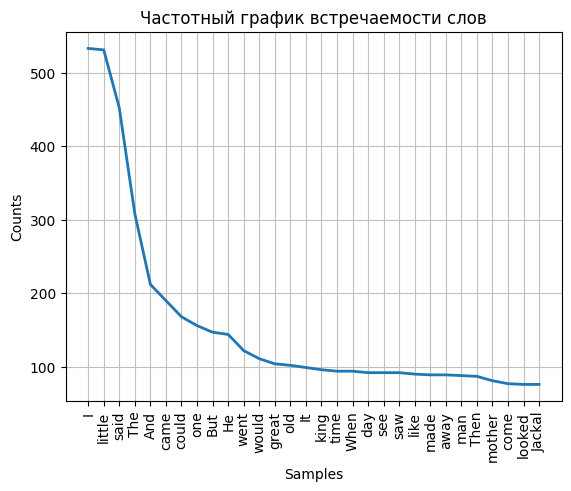

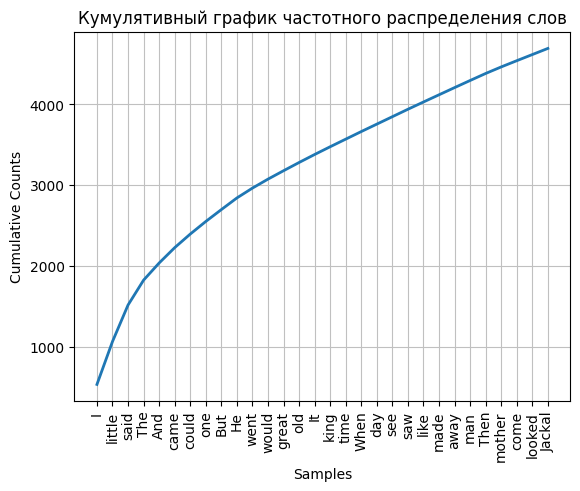

Длина словаря лемм  3750
Ключевые леммы: ['Jackal', 'Little', 'Margery', 'beautiful', 'began', 'child', 'could', 'every', 'father', 'garden', 'great', 'heard', 'house', 'little', 'looked', 'mother', 'never', 'people', 'stood', 'tailor', 'thing', 'think', 'thought', 'would']


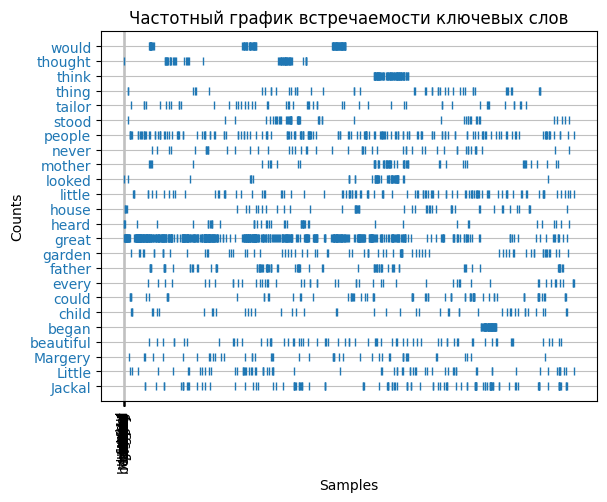

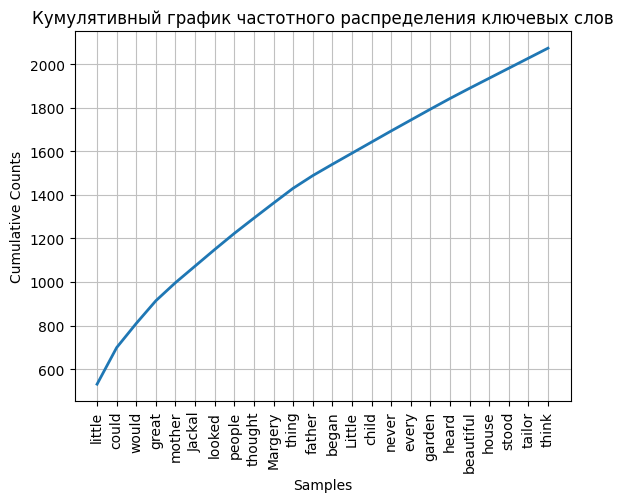

Соответствующие ключевым словам биграммы: [('Little', 'Fir'), ('Little', 'Jack'), ('began', 'talk'), ('great', 'deal'), ('tailor', 'wife'), ('every', 'day'), ('could', 'catch'), ('little', 'Red'), ('little', 'House'), ('little', 'Tulip'), ('fast', 'could'), ('In', 'great'), ('Margery', 'father')]
Длина текста  96825
Число различных слов в словаре  10751
Параметр лексического разнообразия текста  0.11103537309579138
Число слов(токенизация)  79256
Число предложений  1835
Длина текста без стоп слов  52119
Самые частые 15 слов  [('And', 592), ('I', 589), ('Of', 561), ('To', 465), ('The', 459), ('Heaven', 401), ('thou', 382), ('thy', 339), ('thee', 337), ('With', 282), ('In', 281), ('God', 252), ('shall', 241), ('thus', 240), ('But', 216)]


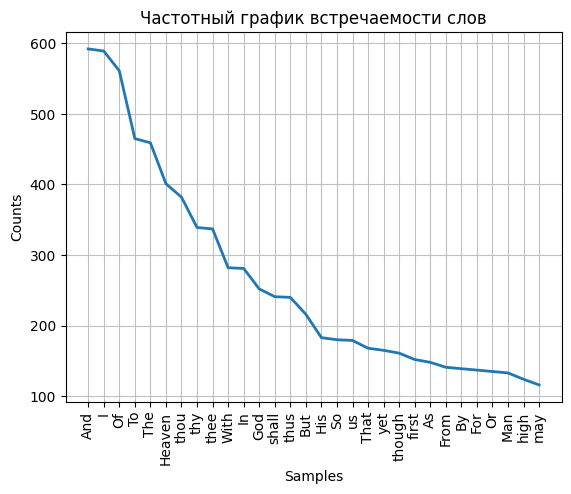

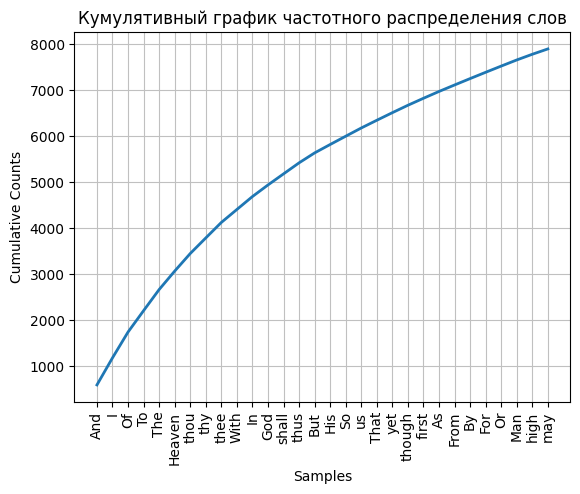

Длина словаря лемм  9759
Ключевые леммы: ['Angels', 'Father', 'Heaven', 'Paradise', 'Spirits', 'Though', 'behold', 'bright', 'called', 'ground', 'heavenly', 'perhaps', 'replied', 'seemed', 'thence', 'though', 'thought', 'throne', 'within', 'without']


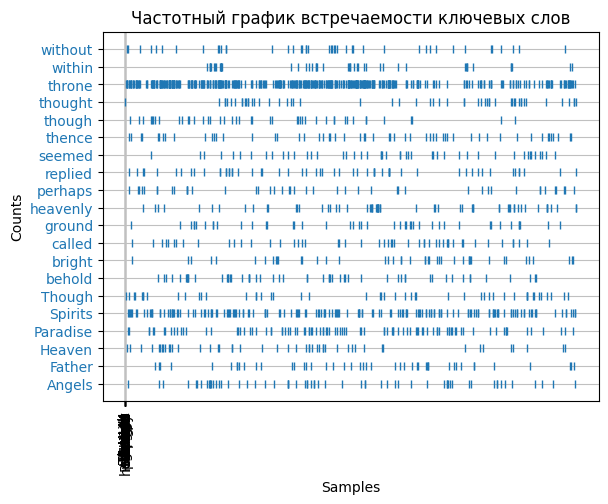

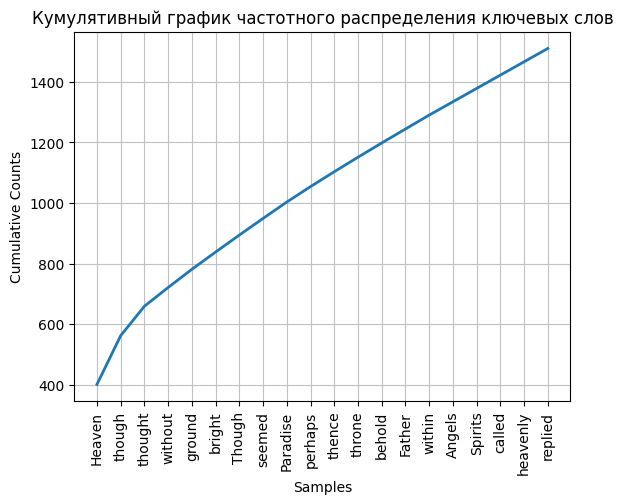

Соответствующие ключевым словам биграммы: [('Eternal', 'Father'), ('without', 'end'), ('replied', 'O'), ('thus', 'replied'), ('wall', 'Heaven'), ('Heaven', 'Earth'), ('In', 'Paradise')]


In [3]:
text = gutenberg.raw('bryant-stories.txt')
words = gutenberg.words('bryant-stories.txt')
analyze_text(text, words)
text = gutenberg.raw('milton-paradise.txt')
words = gutenberg.words('milton-paradise.txt')
analyze_text(text, words)